<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 5: Practical - Lasso & Ridge Regression <br> <br>
<font color=686880 size=4>
    TAs: Alireza Dehghanpour - Arman Malekzadeh - Ali Salesi
    
____

### Full Name : Pardis Zahraei
### Colab Link: https://colab.research.google.com/drive/1pAiSQoxvxi8TwpoSb_p8FjGoNU_5Yqd3?usp=sharing
___

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.

In this assignment you have to predict **life expectancy**.

In [ ]:
# to make things simple I first declare each name of features
Country="Country"
Year="Year"
Status="Status"
Life_expectancy="Life expectancy "
Adult_Mortality="Adult Mortality"
infant_deaths="infant deaths"
Alcohol="Alcohol"
percentage_expenditure="percentage expenditure"
Hepatitis_B="Hepatitis B"
Measles="Measles "
BMI=" BMI "
under_five_deaths="under-five deaths " 
Polio="Polio"
Total_expenditure="Total expenditure"
Diphtheria="Diphtheria "
HIV=" HIV/AIDS"
GDP="GDP"
Population="Population"
thinness1=" thinness  1-19 years"
thinness5=" thinness 5-9 years"
Income="Income composition of resources"
Schooling="Schooling"

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Data Exploration (20 points)

In [ ]:
!wget -O /content/dataset.csv "https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1"

--2023-05-10 11:41:20--  https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2kz21qjt40pjy43/train.csv [following]
--2023-05-10 11:41:20--  https://www.dropbox.com/s/dl/2kz21qjt40pjy43/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc69c4cb9a4d6bc7bce0a09372a0.dl.dropboxusercontent.com/cd/0/get/B7wyQTPurKpV3JQF_XqpWT282Oifq0UUtZg9sW8jWR7TbCxcnaC6OFcrA-J7KUxlOQvGeDZdfMsyeIE3Vq1TwLge0xZ-7UboGEQ_P0nbK6nUG9R_537IIJgEbUAvqmZ0OAuO-iwEiSonk6mhCzSooOPtsR8rq6WnDyDCEdHS1mWXQY1sbJupDgFzv4-oBhwU4j4/file?dl=1# [following]
--2023-05-10 11:41:21--  https://uc69c4cb9a4d6bc7bce0a09372a0.dl.dropboxusercontent.com/cd/0/get/B7wyQTPurKpV3JQF_XqpWT282Oifq0UUtZg9sW8jWR7TbCxcnaC6OFcrA-J7KUxlOQ

Load the dataset as a dataframe

In [ ]:
df = pd.read_csv("dataset.csv")
num_columns = df.shape[1]
print("Number of columns:", num_columns)

Number of columns: 22


Plot "year" against "average life expectancy"

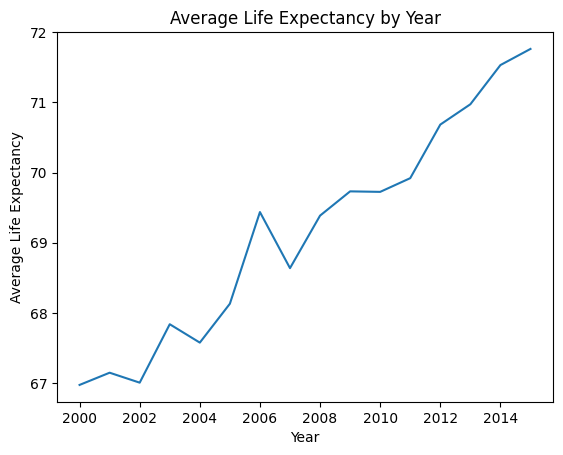

In [ ]:
import matplotlib.pyplot as plt
df_grouped = df.groupby("Year")["Life expectancy "].mean().reset_index()
df_grouped.columns = ["year", "average life expectancy"]
plt.plot(df_grouped["year"], df_grouped["average life expectancy"])
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.title("Average Life Expectancy by Year")
plt.show()

Compare the average life expectancy of "Developed" and "Developing" countries for each year 

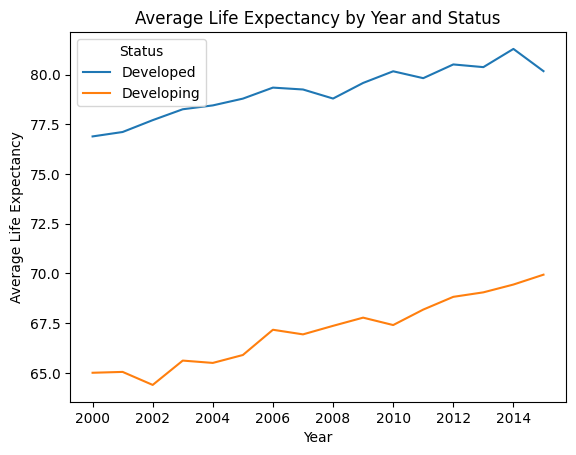

In [ ]:
df_grouped = df.groupby(["Year", "Status"])["Life expectancy "].mean().reset_index()
df_pivoted = df_grouped.pivot_table(index="Year", columns="Status", values="Life expectancy ")
df_pivoted.plot()
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.title("Average Life Expectancy by Year and Status")
plt.show()

Get the correlation between "Life expectancy" and "GDP"

In [ ]:
corr = df[Life_expectancy].corr(df["GDP"])
print("Correlation between Life expectancy and GDP:", corr)

Correlation between Life expectancy and GDP: 0.4652553879500644


Find out the feature having the strongest correlation with the "Life expectancy"<br>
Note: Do not display all of the correlation values. Your code should only print the result (the name of a column).

In [ ]:
corr_values = df.corr().abs()[Life_expectancy]
max_corr_column = corr_values.drop(Life_expectancy).idxmax()
print("Column with strongest correlation to Life expectancy:", max_corr_column)

Column with strongest correlation to Life expectancy: Schooling


<ipython-input-8-de8f91b758e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr().abs()[Life_expectancy]


# Preprocessing (20 points)

Remove the rows containing NaN (or null) values

In [ ]:
df.dropna(inplace=True)

Convert categorical columns into their one-hot encoded versions

In [ ]:
one_hot_status = pd.get_dummies(df["Status"], prefix="Status")
one_hot_country = pd.get_dummies(df["Country"], prefix="Country")
df = pd.concat([df, one_hot_status, one_hot_country], axis=1)
df.drop(["Status", "Country"], axis=1, inplace=True)

Convert the dataframe into two numpy arrays (called `x` and `y`).<br>
To make the first array, remove the "Life expectancy" column, and convert the remaining dataframe to a numpy array.<br>
Then, use the removed column to make another numpy array (`y`).

In [ ]:
x = df.drop(Life_expectancy, axis=1).to_numpy()
y = df[Life_expectancy].to_numpy()

Normalize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Model Training

Split the data to training (80%) and testing (20%) parts (5 points)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

# Common Regression Class

This is a regression class and you do not need to change its code. You have to fully understand it and then create new classes for rigde and lasso regression which inherit from this class.
For initialization you have to specify learning rate, number of iteration, and a regularization object.

In [ ]:
class Regression:
    def __init__(self, learning_rate, iteration, regularization):
        
        self.N = None # number of samples
        self.n = None # number of features
        self.w = None # initial weights
        self.regularization = regularization # will be the l1/l2 regularization class according to the regression model
        self.lr = learning_rate
        self.it = iteration

    def loss_function(self, y, y_pred):
        return (1 / (2*self.N)) * np.sum(np.square(y_pred - y)) + self.regularization(self.w)
    
    def hypothesis(self, weights, X):
        return np.dot(X, weights)

    def train(self, X, y):
        # Target value should be in the shape of (n, 1) not (n, ).

        # Insert constant ones for bias weights.
        X = np.insert(X, 0, 1, axis=1)

        self.N = X.shape[0]
        self.n = X.shape[1]
        self.w = np.zeros((self.n , 1))

        for it in range(1, self.it+1):
            y_pred = self.hypothesis(self.w, X)
            cost = self.loss_function(y, y_pred)
            dw = (1/self.N) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
            self.w = self.w - self.lr * dw

            if it % 10 == 0:
                print("The loss function for the iteration {}----->{} :)".format(it, cost))
    
    def predict(self, test_X):
        # Insert constant ones for bias weights.
        test_X = np.insert(test_X, 0, 1, axis=1)
        y_pred = self.hypothesis(self.w, test_X)
        return y_pred

# Regularization Classes (20 points)

You have to implement l2/l1 regularization.

In [ ]:
class l1_regularization:
    """Regularization used for Lasso Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be returned when we call this class."
        return self.lamda * np.sum(np.abs(weights))

    def derivation(self, weights):
        "Derivation of the regulariozation function."
        return self.lamda * np.sign(weights)
        

class l2_regularization:
    """Regularization used for Ridge Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be returned when we call this class."
        return self.lamda * np.sum(np.square(weights))
    
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        return 2 * self.lamda * weights


# Lasso Regression from scratch (5 points)

Train a lasso regression model using your own code and the following class.

In [ ]:
class LassoRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l1_regularization(lamda)
        super(LassoRegression, self).__init__(learning_rate, iteration, self.regularization)

In [ ]:
#new
lasso_model_new = LassoRegression(lamda=0.1, learning_rate=0.01, iteration=500)
lasso_model_new.train(x_train, y_train)
y_pred = lasso_model_new.predict(x_test)

The loss function for the iteration 10----->2284491.5907558873 :)
The loss function for the iteration 20----->1864729.3169268006 :)
The loss function for the iteration 30----->1523879.6040909293 :)
The loss function for the iteration 40----->1246756.132682457 :)
The loss function for the iteration 50----->1021215.6997474547 :)
The loss function for the iteration 60----->837484.7317019318 :)
The loss function for the iteration 70----->687678.726904915 :)
The loss function for the iteration 80----->565425.5745966443 :)
The loss function for the iteration 90----->465569.7540138302 :)
The loss function for the iteration 100----->383936.1949853533 :)
The loss function for the iteration 110----->317145.1062451578 :)
The loss function for the iteration 120----->262446.128092198 :)
The loss function for the iteration 130----->217610.03556357053 :)
The loss function for the iteration 140----->180825.5348474841 :)
The loss function for the iteration 150----->150621.18008655543 :)
The loss functi

In [ ]:
print(y_pred.shape)
y_pred

(283, 1132)


array([[65.91985978, 64.22724271, 64.52627361, ..., 72.72577462,
        76.58088167, 61.54248219],
       [65.91119476, 64.2268681 , 64.52734795, ..., 72.767631  ,
        76.63361489, 61.55065484],
       [65.95061909, 64.23891339, 64.54292334, ..., 72.8509486 ,
        76.74801915, 61.54503265],
       ...,
       [65.91055432, 64.22504332, 64.53358803, ..., 72.75875169,
        76.61774931, 61.54028478],
       [65.92047717, 64.22053414, 64.51967781, ..., 72.73470323,
        76.59633935, 61.54496242],
       [65.90686067, 64.22057876, 64.52544807, ..., 72.76445046,
        76.6571246 , 61.54072742]])

In [ ]:
y_pred_mean_lasso = np.mean(y_pred, axis=1)
print(y_pred_mean_lasso.shape)

(283,)


# Lasso Regression using skicit-learn (5 points)

Use `sklearn` to train a Lasso Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_reg = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)
alpha_lasso=grid_search.best_params_['alpha']
lasso_reg_best = Lasso(alpha=grid_search.best_params_['alpha'])
lasso_reg_best.fit(x_train, y_train)
test_score = lasso_reg_best.score(x_test, y_test)
print("Test Score: ", test_score)
# could have easily used lassoCV ...

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.319e+02, tolerance: 6.610e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.886e+01, tolerance: 6.919e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.464e+02, tolerance: 6.751e

Best Hyperparameters:  {'alpha': 0.001}
Best Score:  0.952656988252101
Test Score:  0.9507447139858065


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.535e+02, tolerance: 8.336e+00
  model = cd_fast.enet_coordinate_descent(


# Ridge Regression From scratch (5 points)

Train a ridge regression model using your own code and the following class.

In [ ]:
class RidgeRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l2_regularization(lamda)
        super(RidgeRegression, self).__init__(learning_rate, iteration, self.regularization)

In [ ]:
ridge_model = RidgeRegression(lamda=0.1, learning_rate=0.01, iteration=500)
ridge_model.train(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

The loss function for the iteration 10----->2289230.652981366 :)
The loss function for the iteration 20----->1889608.958280023 :)
The loss function for the iteration 30----->1578247.1538628628 :)
The loss function for the iteration 40----->1335329.5518104143 :)
The loss function for the iteration 50----->1145616.291071978 :)
The loss function for the iteration 60----->997317.5392254712 :)
The loss function for the iteration 70----->881289.5649285975 :)
The loss function for the iteration 80----->790430.6088676838 :)
The loss function for the iteration 90----->719218.9379333031 :)
The loss function for the iteration 100----->663357.3079328816 :)
The loss function for the iteration 110----->619498.5084992704 :)
The loss function for the iteration 120----->585033.1335962962 :)
The loss function for the iteration 130----->557925.2675134595 :)
The loss function for the iteration 140----->536585.1394369551 :)
The loss function for the iteration 150----->519770.3396269649 :)
The loss function

In [ ]:
print(y_pred_ridge.shape)
y_pred_mean_ridge = np.mean(y_pred_ridge, axis=1)
print(y_pred_mean_ridge.shape)

(283, 1132)
(283,)


# Ridge Regression using scikit-learn (5 points)

Use `sklearn` to train a Ridge Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1,0.5, 1, 10, 100]}
model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print('Best alpha:', grid_search.best_params_['alpha'])
alpha_ridge=grid_search.best_params_['alpha']
best_model_ridge = Ridge(alpha=grid_search.best_params_['alpha'])
best_model_ridge.fit(x_train, y_train)
mse = mean_squared_error(y_test, best_model_ridge.predict(x_test))
print('MSE:', mse)

Best alpha: 0.1
MSE: 3.81683654219914


# Evaluation (15 points)

For each model (the 2 models trained using `sklearn` and the ones based on your code), predict the output for the testing samples.

In [ ]:
#sklearn lasso
lasso_sklearn_pred = lasso_reg_best.predict(x_test)

In [ ]:
#sklearn ridge
ridge_sklearn_pred = best_model_ridge.predict(x_test)

In [ ]:
# lasso
lasso_reg = LassoRegression(lamda=alpha_lasso, learning_rate=0.01, iteration=1000)
lasso_reg.train(x_train, y_train)
lasso_pred = lasso_reg.predict(x_test)
y_pred_mean_lasso = np.mean(lasso_pred, axis=1)

The loss function for the iteration 10----->2281634.397076563 :)
The loss function for the iteration 20----->1859500.8760629473 :)
The loss function for the iteration 30----->1517015.718497192 :)
The loss function for the iteration 40----->1238782.6652996016 :)
The loss function for the iteration 50----->1012516.7924801303 :)
The loss function for the iteration 60----->828342.505151219 :)
The loss function for the iteration 70----->678297.0356344591 :)
The loss function for the iteration 80----->555949.5093913804 :)
The loss function for the iteration 90----->456100.3451547329 :)
The loss function for the iteration 100----->374541.4699964843 :)
The loss function for the iteration 110----->307864.2910876341 :)
The loss function for the iteration 120----->253305.5474163079 :)
The loss function for the iteration 130----->208623.2067018446 :)
The loss function for the iteration 140----->171996.69385056547 :)
The loss function for the iteration 150----->141946.53067675856 :)
The loss functi

In [ ]:
# ridge
ridge_reg = RidgeRegression(lamda=alpha_ridge, learning_rate=0.01, iteration=1000)
ridge_reg.train(x_train, y_train)
ridge_pred = ridge_reg.predict(x_test)
y_pred_mean_ridge = np.mean(ridge_pred, axis=1)

The loss function for the iteration 10----->2289230.652981366 :)
The loss function for the iteration 20----->1889608.958280023 :)
The loss function for the iteration 30----->1578247.1538628628 :)
The loss function for the iteration 40----->1335329.5518104143 :)
The loss function for the iteration 50----->1145616.291071978 :)
The loss function for the iteration 60----->997317.5392254712 :)
The loss function for the iteration 70----->881289.5649285975 :)
The loss function for the iteration 80----->790430.6088676838 :)
The loss function for the iteration 90----->719218.9379333031 :)
The loss function for the iteration 100----->663357.3079328816 :)
The loss function for the iteration 110----->619498.5084992704 :)
The loss function for the iteration 120----->585033.1335962962 :)
The loss function for the iteration 130----->557925.2675134595 :)
The loss function for the iteration 140----->536585.1394369551 :)
The loss function for the iteration 150----->519770.3396269649 :)
The loss function

Measure the performance of the models based on "mean squared error" and the "coefficient of determination" of the prediction.

In [ ]:
#sklearn lasso 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, lasso_sklearn_pred)
r2 = r2_score(y_test, lasso_sklearn_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.841316736444481
R-squared: 0.9507447139858065


In [ ]:
#sklearn ridge
mse = mean_squared_error(y_test, ridge_sklearn_pred)
r2 = r2_score(y_test, ridge_sklearn_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.81683654219914
R-squared: 0.95105861129029


In [ ]:
#lasso
mse = mean_squared_error(y_test, y_pred_mean_lasso)
r2 = r2_score(y_test, y_pred_mean_lasso)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 78.01390755229347
R-squared: -0.00033337348009787604


In [ ]:
#ridge
mse = mean_squared_error(y_test, y_pred_mean_ridge)
r2 = r2_score(y_test, y_pred_mean_ridge)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 251.52204103744137
R-squared: -2.2251415127095058


# Kaggle

Competition Link: https://www.kaggle.com/t/adbf95666e7c4f41a6be1129a9e4415c

In [ ]:
df = pd.read_csv("dataset.csv")
# sort the "country" column in alphabetical order
df_sorted = df.sort_values(Country)
df_sorted.to_csv('sorted_training.csv', index=False)
df_test = pd.read_csv('assignment5-test-data.csv')
df_sorted_test = df_test.sort_values(Country)
df_sorted_test.to_csv('sorted_test.csv', index=False)

In [ ]:
# to make things simple I first declare each name of features
Country="Country"
Year="Year"
Status="Status"
Life_expectancy="Life expectancy "
Adult_Mortality="Adult Mortality"
infant_deaths="infant deaths"
Alcohol="Alcohol"
percentage_expenditure="percentage expenditure"
Hepatitis_B="Hepatitis B"
Measles="Measles "
BMI=" BMI "
under_five_deaths="under-five deaths " 
Polio="Polio"
Total_expenditure="Total expenditure"
Diphtheria="Diphtheria "
HIV=" HIV/AIDS"
GDP="GDP"
Population="Population"
thinness1=" thinness  1-19 years"
thinness5=" thinness 5-9 years"
Income="Income composition of resources"
Schooling="Schooling"

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv")
df = df.fillna(df.median())
df_test = pd.read_csv('assignment5-test-data.csv')
df_test = df_test.drop(["ID"], axis=1)
df_test = df_test.fillna(df_test.median())

df_combined = pd.concat([df, df_test], axis=0)
df_combined.to_csv('combining.csv', index=False)
df_combined = pd.get_dummies(df_combined,columns=[Status,Country])
df_combined.to_csv('combining2.csv', index=False)
df_combined = df_combined.drop([thinness5,GDP,infant_deaths,"Status_Developing"],axis=1)
df1 = df_combined.iloc[:2497]
df1.to_csv('unknown_train.csv', index=False)
df2 = df_combined.iloc[2497:]
df2.to_csv('unknown.csv', index=False)

<ipython-input-38-8b7c49fca019>:10: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())
<ipython-input-38-8b7c49fca019>:13: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test = df_test.fillna(df_test.median())


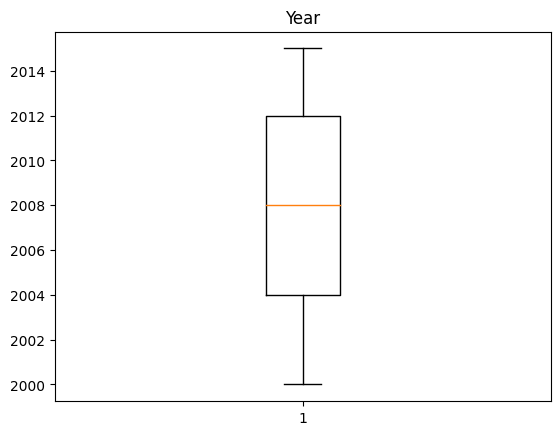

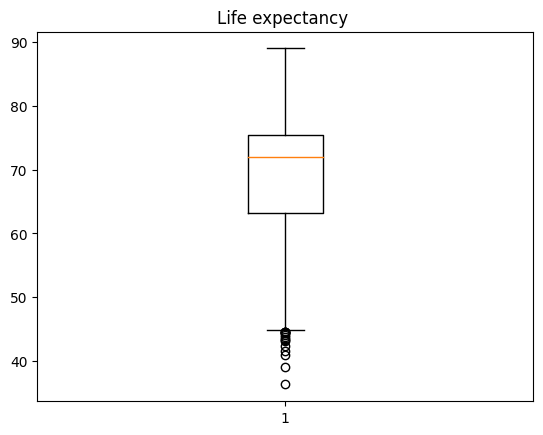

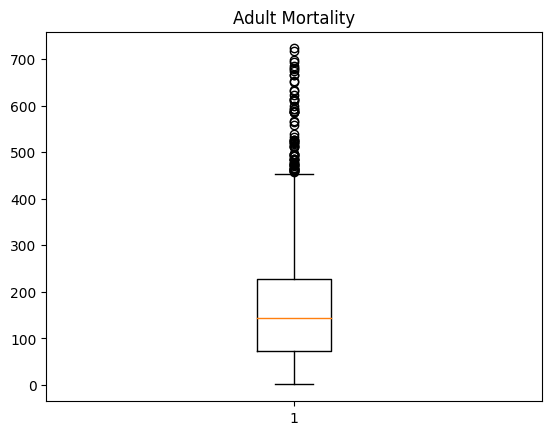

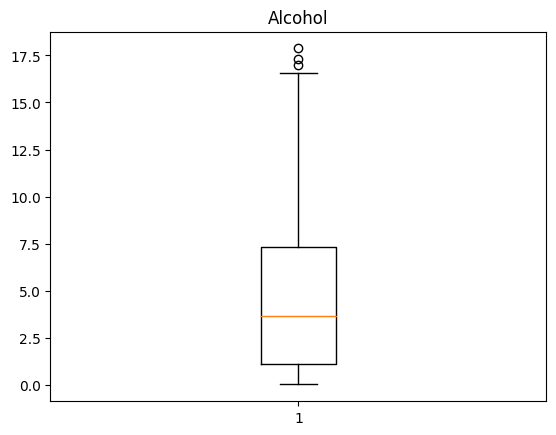

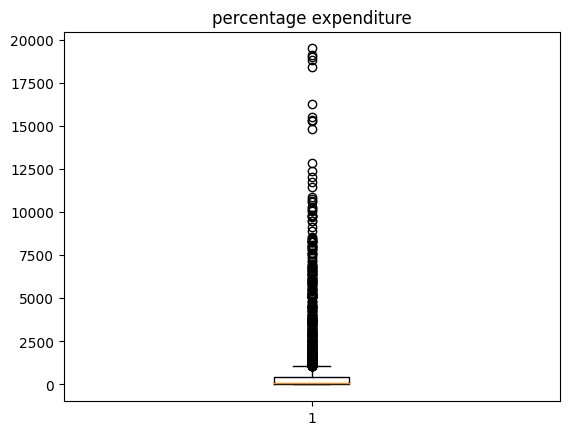

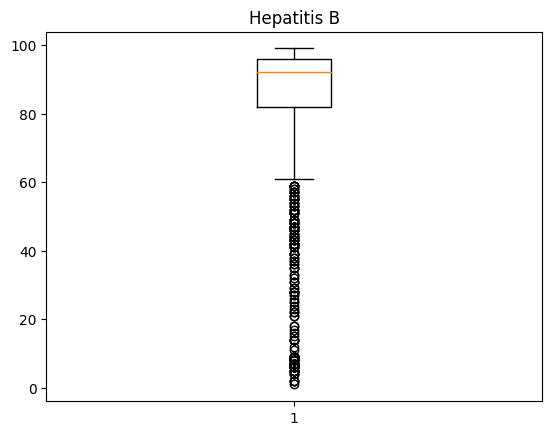

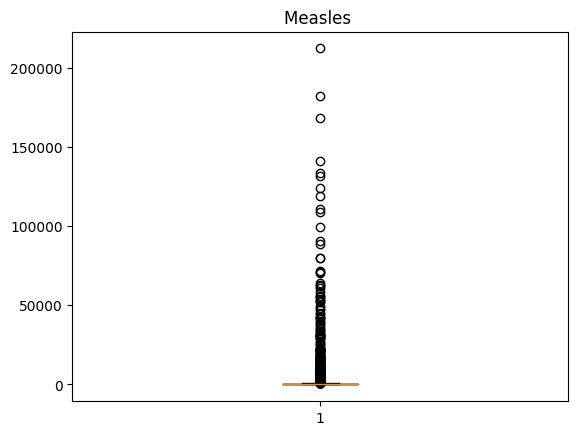

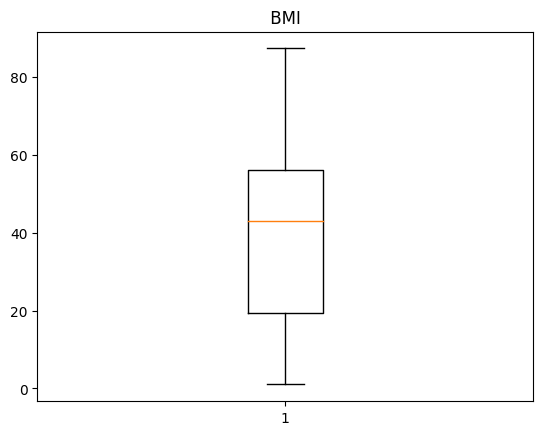

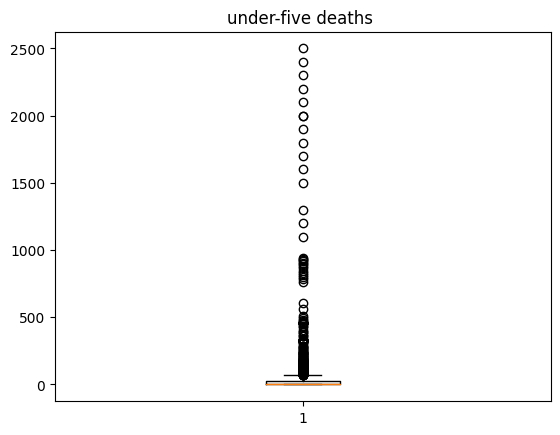

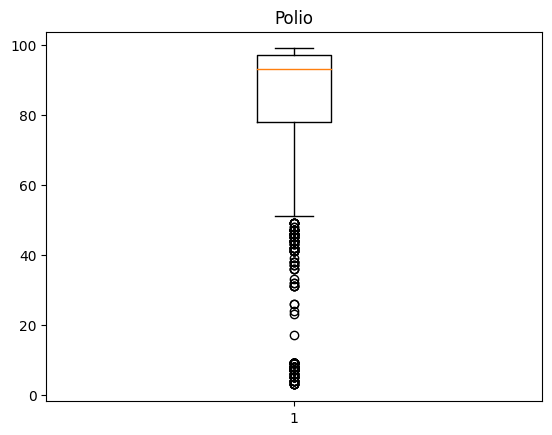

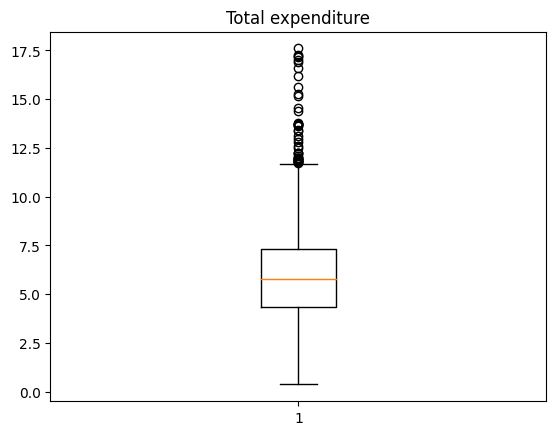

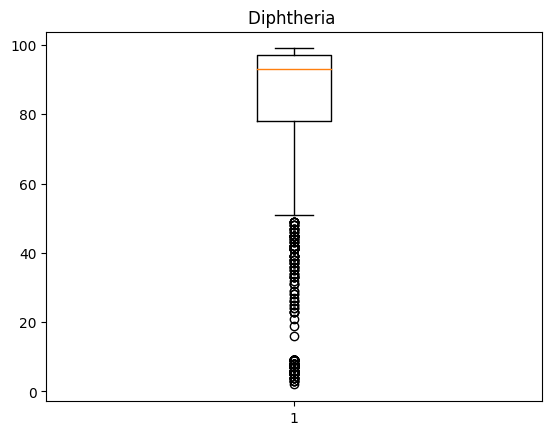

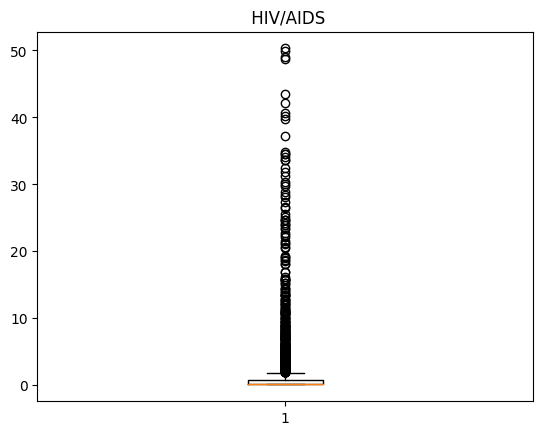

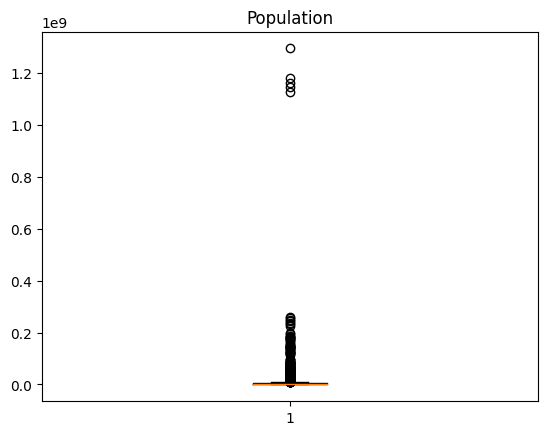

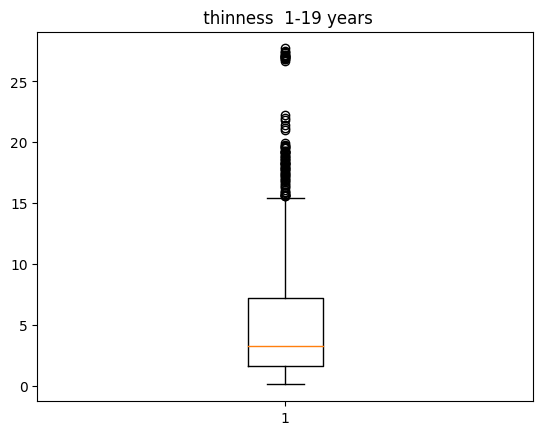

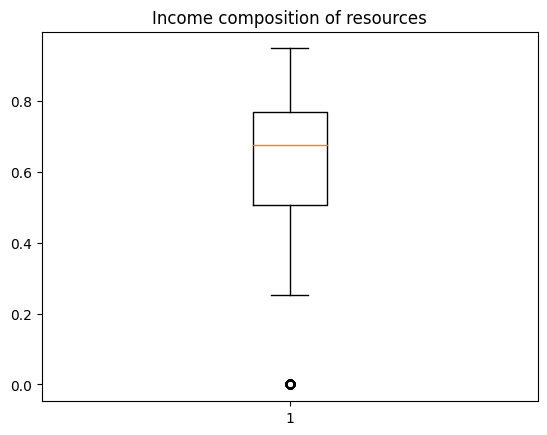

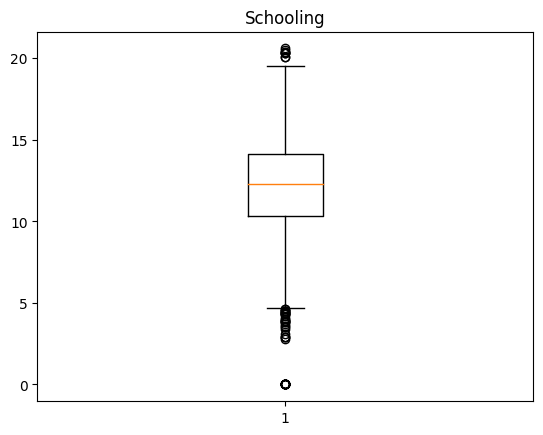

In [ ]:
for col in df1.columns:
    if 'Country' in col or 'Status' in col:
      continue
    plt.boxplot(df1[col])
    plt.title(col)
    plt.show()

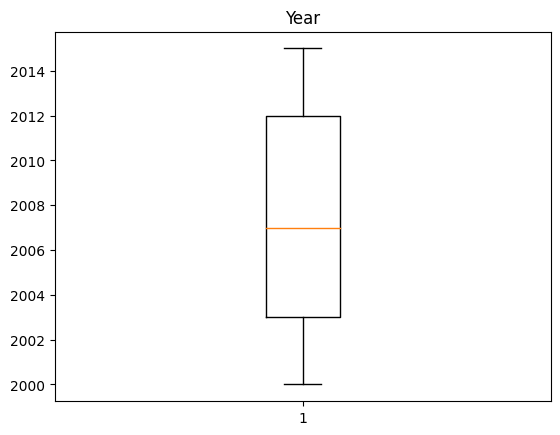

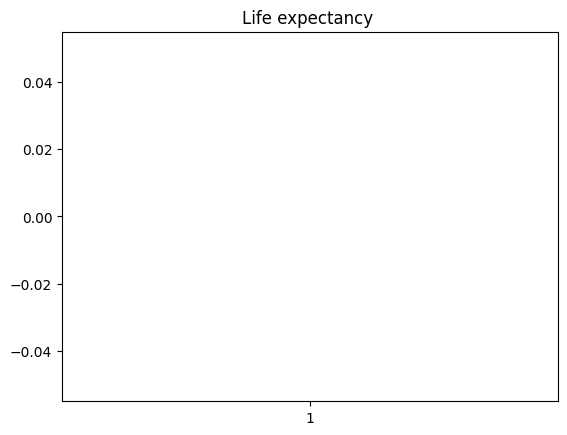

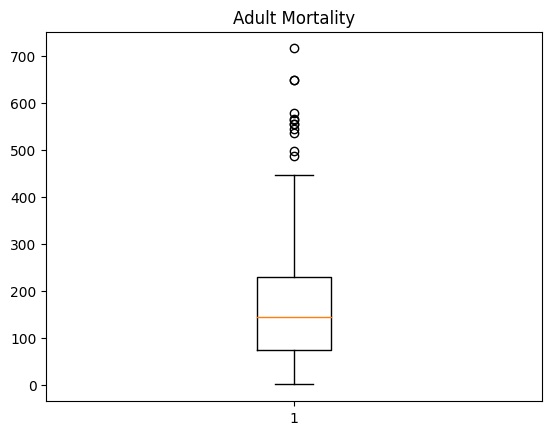

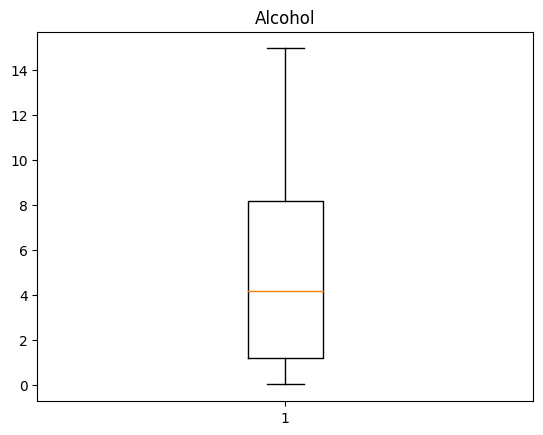

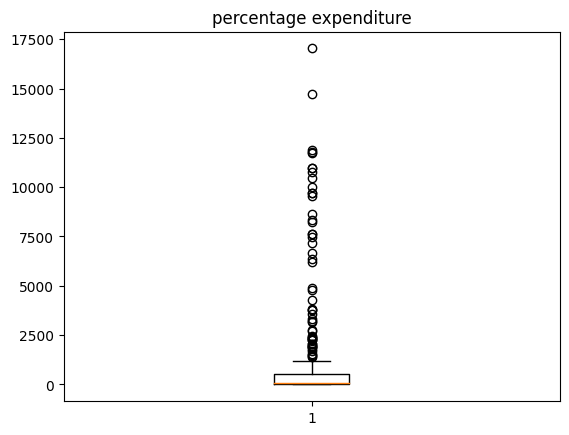

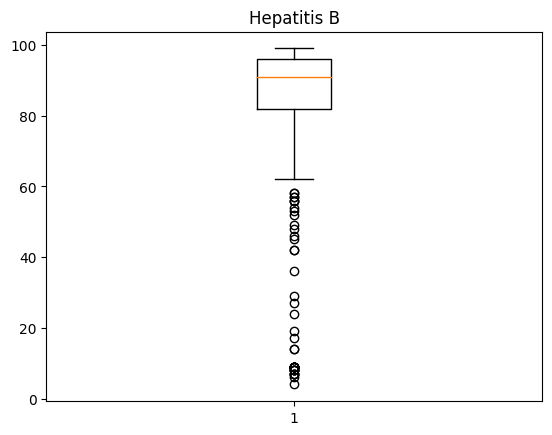

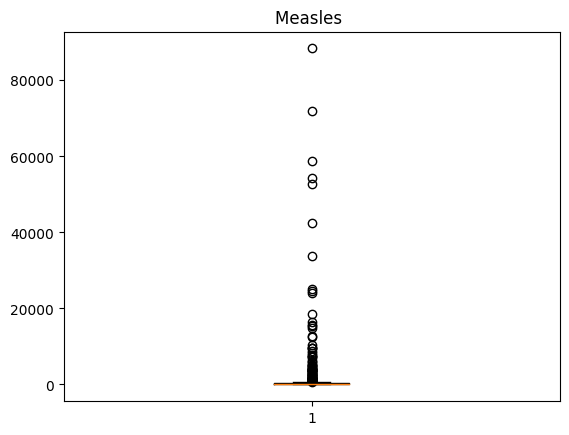

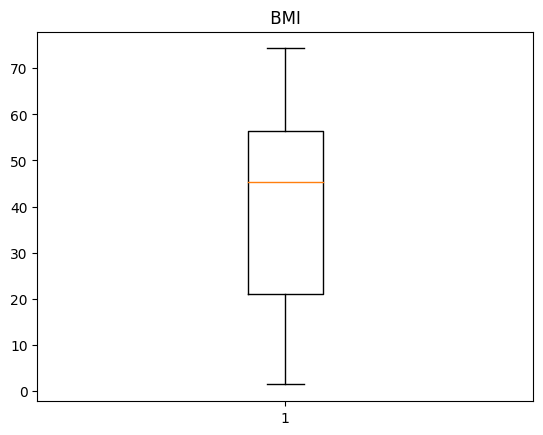

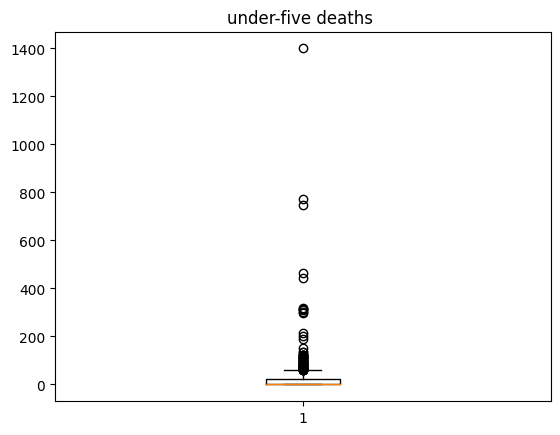

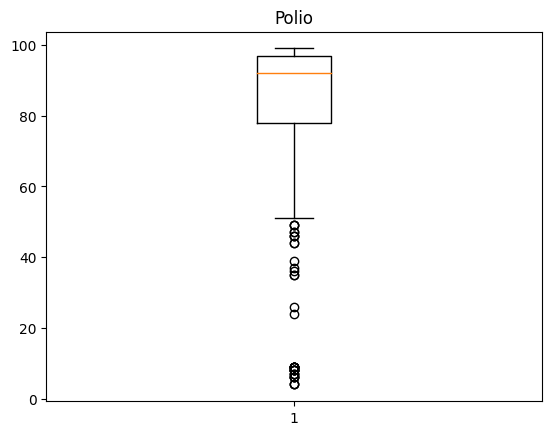

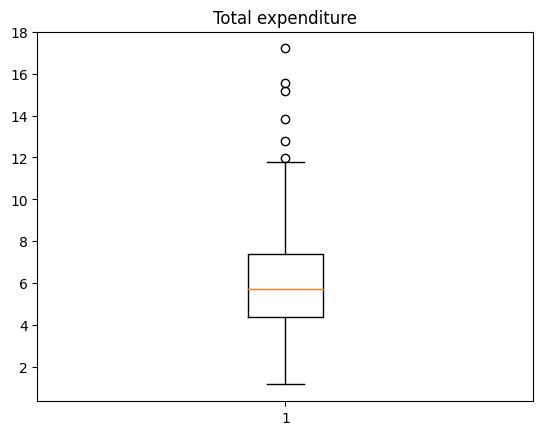

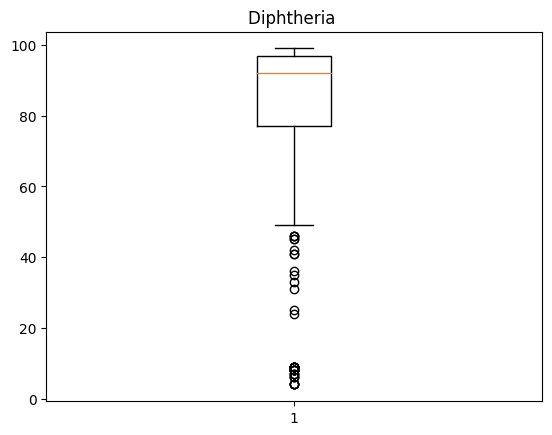

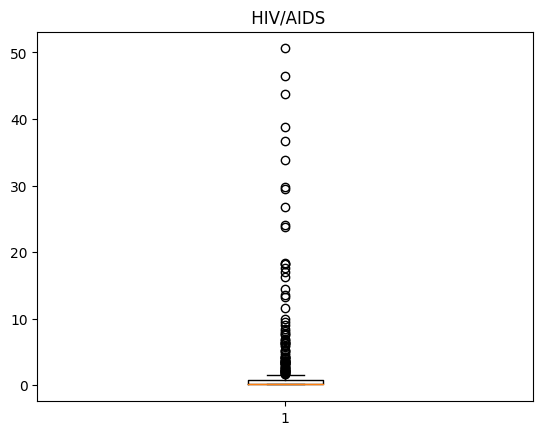

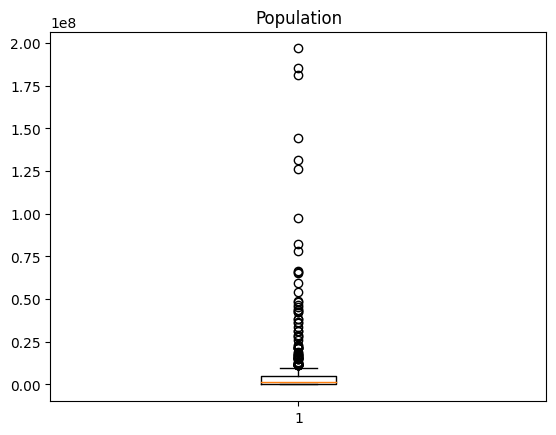

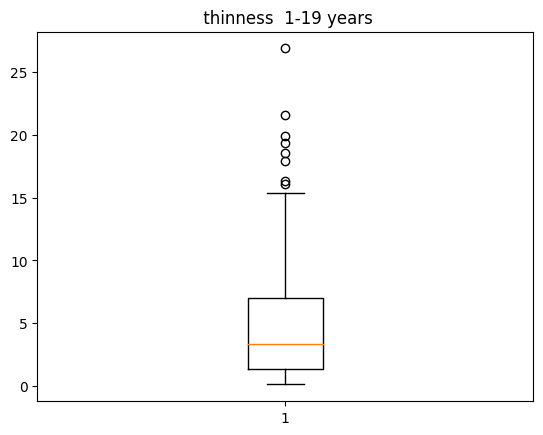

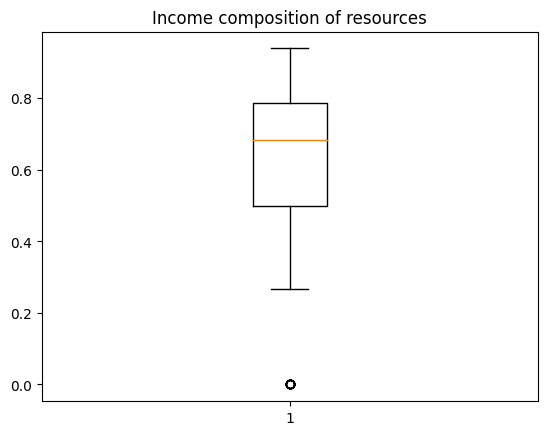

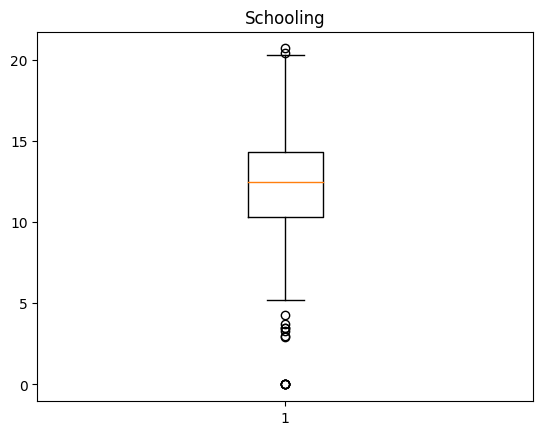

In [ ]:

for col in df2.columns:
    if 'Country' in col or 'Status' in col:
      continue 
    plt.boxplot(df2[col])
    plt.title(col)
    plt.show()

In [ ]:
from scipy.stats.mstats import winsorize
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv")
df = df.fillna(df.median())
df_test = pd.read_csv('assignment5-test-data.csv')
df_test = df_test.drop(["ID"], axis=1)
df_test = df_test.fillna(df_test.median())

df_combined = pd.concat([df, df_test], axis=0)
df_combined.to_csv('combining.csv', index=False)
df_combined = pd.get_dummies(df_combined,columns=[Status,Country])
df_combined.to_csv('combining2.csv', index=False)
df_combined = df_combined.drop([thinness5,GDP,infant_deaths,"Status_Developing"],axis=1)
df_combined.to_csv('combining3.csv', index=False)
df1 = df_combined.iloc[:2497]
df1.to_csv('unknown_train.csv', index=False)
df2 = df_combined.iloc[2497:]
df2.to_csv('unknown.csv', index=False)

<ipython-input-42-a346e9820204>:11: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())
<ipython-input-42-a346e9820204>:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test = df_test.fillna(df_test.median())


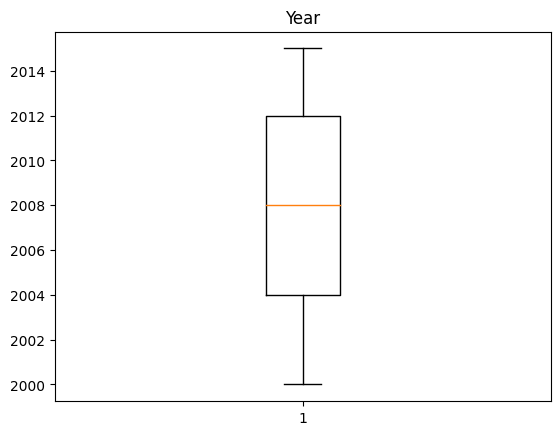

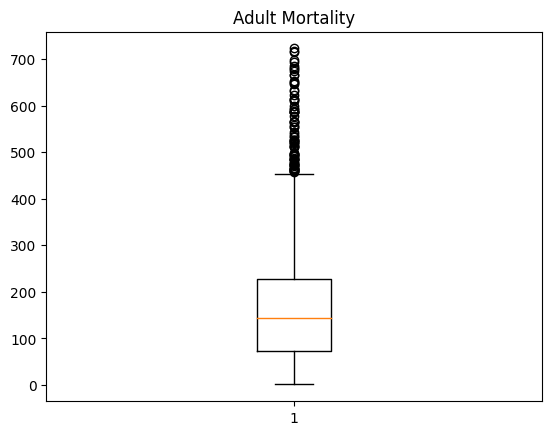

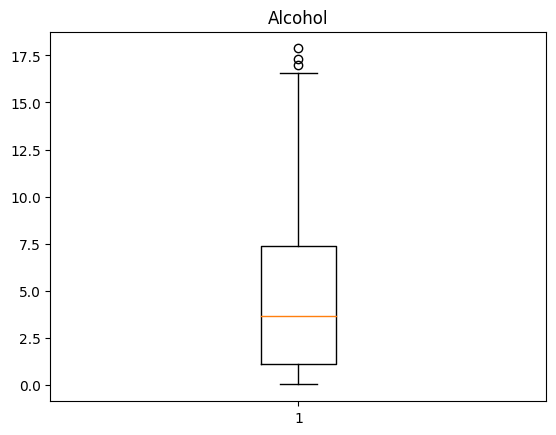

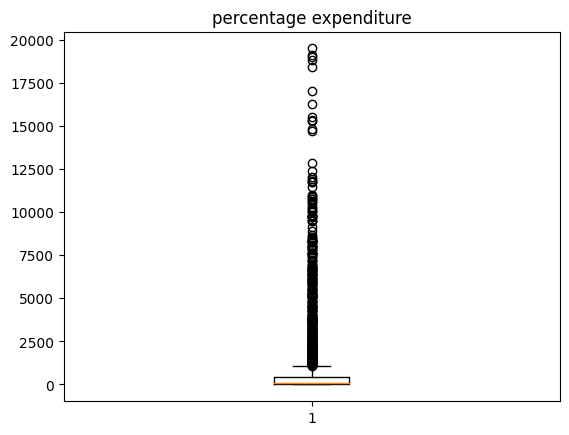

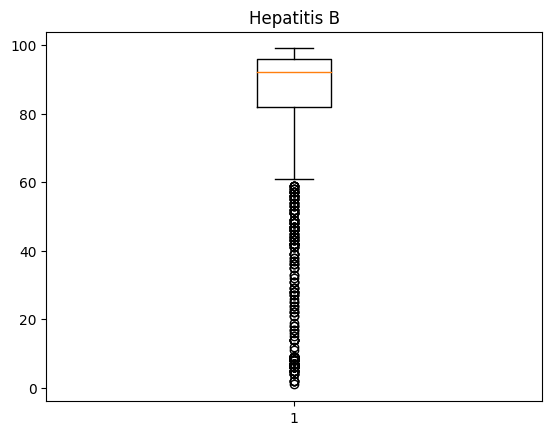

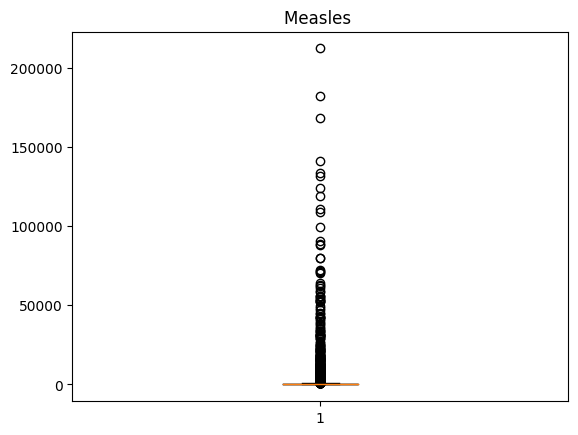

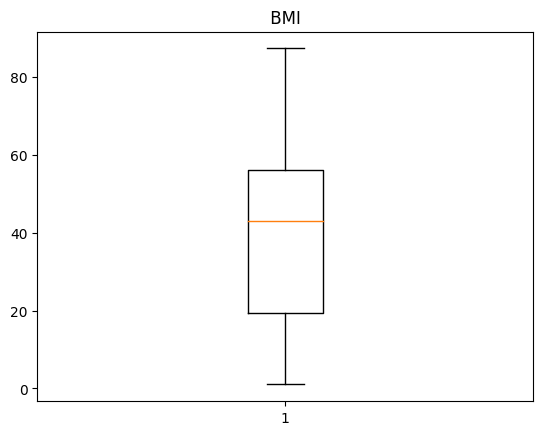

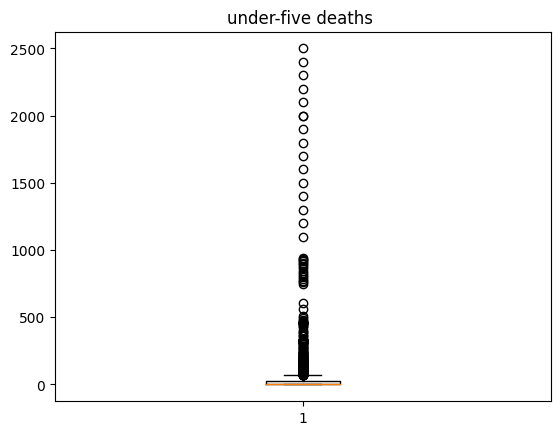

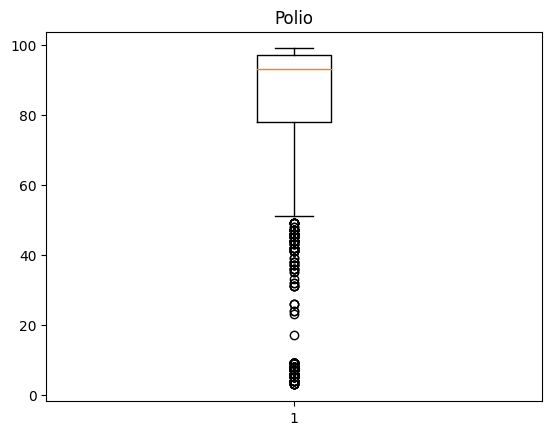

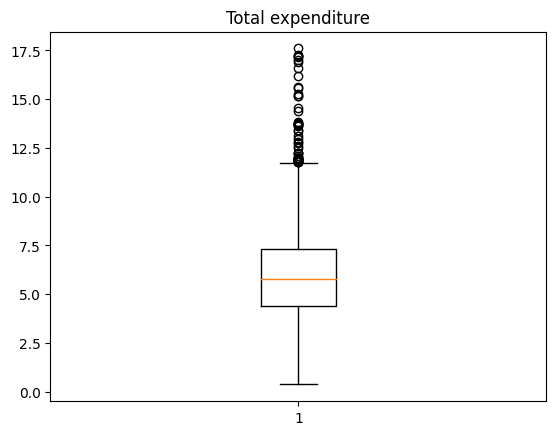

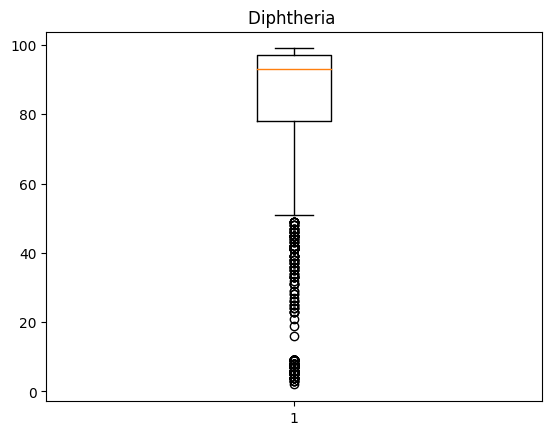

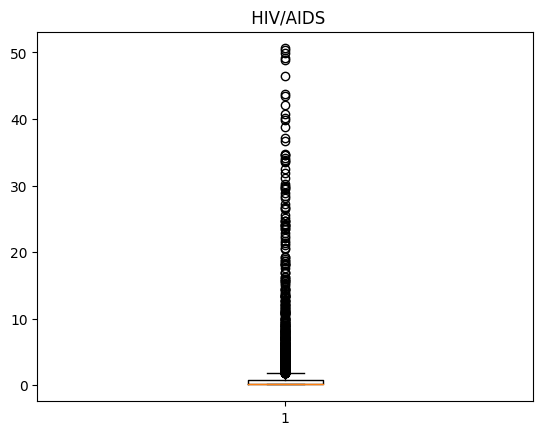

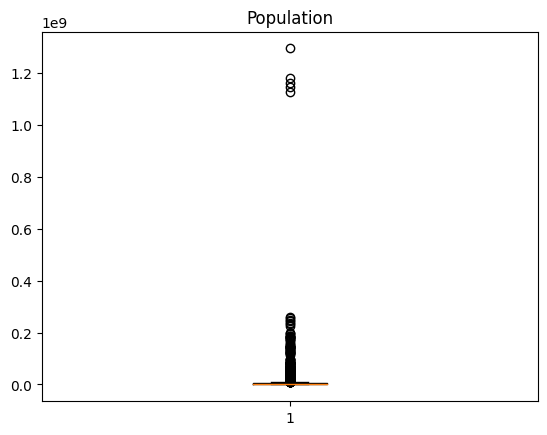

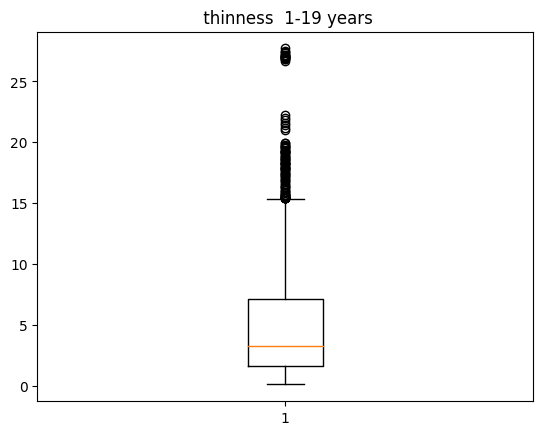

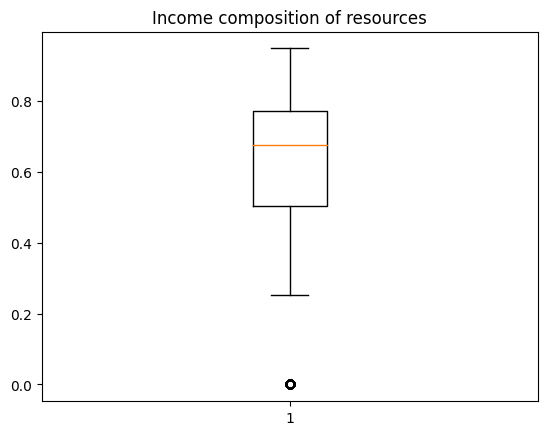

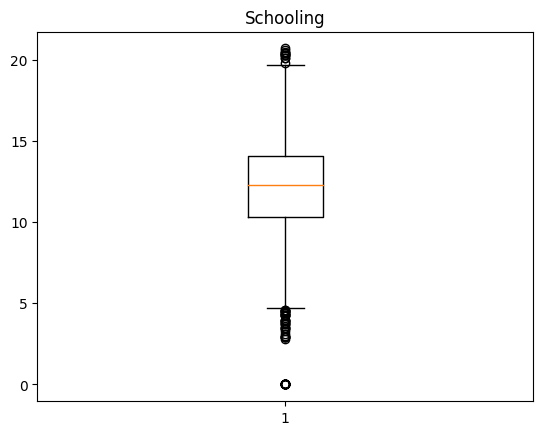

In [ ]:

for col in df_combined.columns:
    if 'Country' in col or 'Status' in col or 'Life expectancy ' in col :
      continue 
    plt.boxplot(df_combined[col])
    plt.title(col)
    plt.show()

In [ ]:
print(df_combined.columns)
for col in df_combined.columns:
    if 'Country' in col or 'Status' in col or 'Life expectancy ' in col :
      continue 
    aa=winsorize(df_combined[col],(0.05,0.05))
    df_combined=df_combined.drop([col], axis=1)
    df_combined[col]=aa
df_combined


Index(['Year', 'Life expectancy ', 'Adult Mortality', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio',
       ...
       'Country_United Republic of Tanzania',
       'Country_United States of America', 'Country_Uruguay',
       'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela (Bolivarian Republic of)', 'Country_Viet Nam',
       'Country_Yemen', 'Country_Zambia', 'Country_Zimbabwe'],
      dtype='object', length=211)


,Life expectancy,Status_Developed,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,...,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Schooling
0,87.0,0,0,0,0,0,0,0,0,0,...,61.4,0,98.0,9.550,98.0,0.1,5438972.0,0.9,0.887,17.0
1,83.7,1,0,0,0,0,0,0,0,0,...,29.0,3,99.0,5.775,96.0,0.1,127141.0,2.1,0.902,15.3
2,64.4,0,0,0,0,0,0,0,0,0,...,56.2,8,52.0,3.250,43.0,0.1,19239.0,6.3,0.575,9.0
3,72.8,1,0,0,0,0,0,0,0,0,...,58.9,0,92.0,6.550,92.0,0.1,297555.0,2.2,0.815,16.0
4,67.1,0,0,0,0,0,0,0,0,0,...,29.3,0,97.0,9.760,97.0,0.2,18745.0,5.7,0.559,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,NaN,0,0,0,0,0,0,0,0,0,...,46.7,20,95.0,4.940,95.0,0.4,2661467.0,1.4,0.686,13.9
437,NaN,0,0,0,0,0,0,0,0,0,...,23.2,28,89.0,4.510,92.0,0.3,141232.0,9.9,0.474,8.7
438,NaN,0,0,0,0,0,0,0,0,0,...,19.2,51,77.0,4.370,8.0,13.6,12725974.0,6.9,0.492,11.1
439,NaN,0,0,0,0,0,0,0,0,0,...,51.4,0,91.0,6.670,91.0,0.1,1589051.5,3.8,0.780,15.5


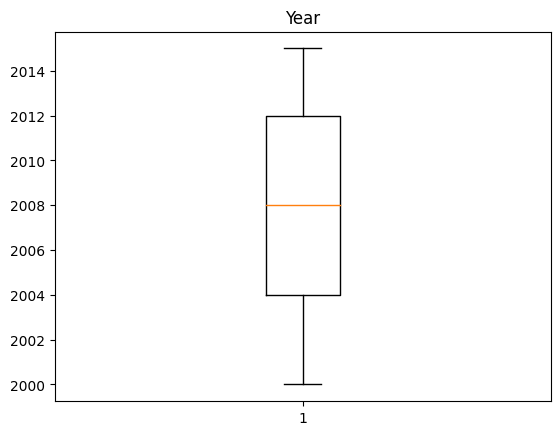

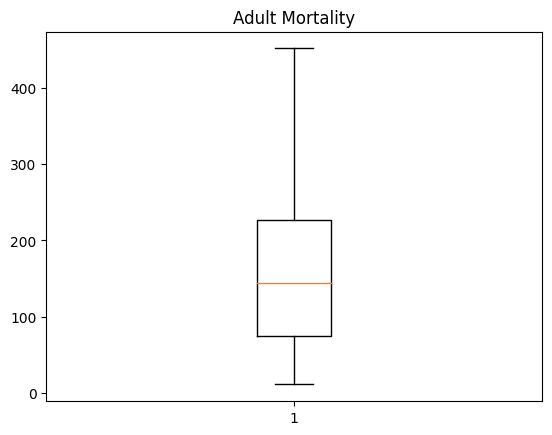

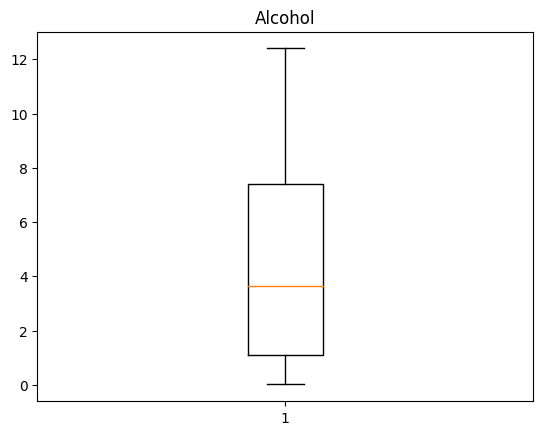

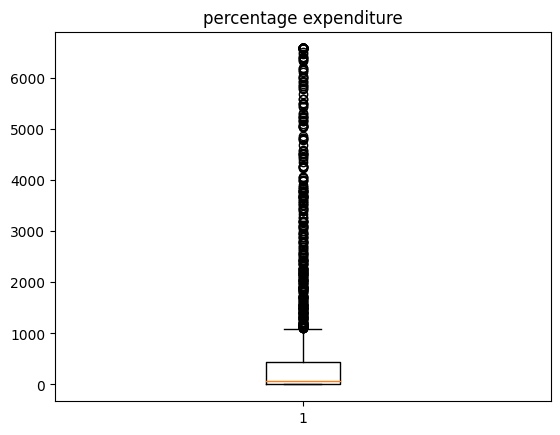

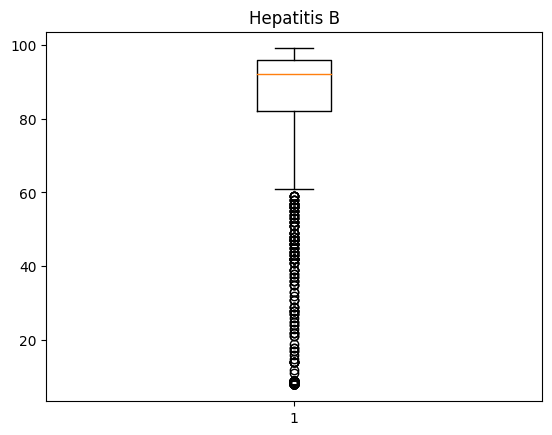

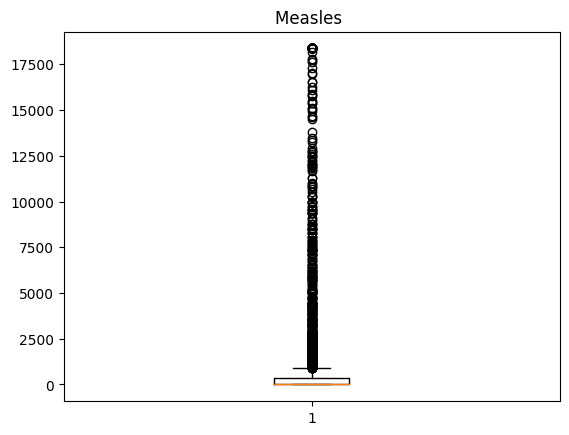

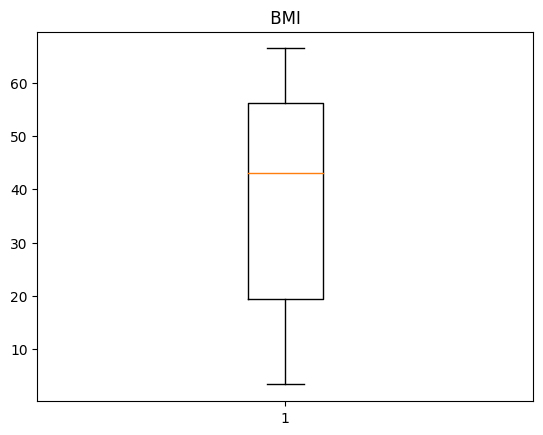

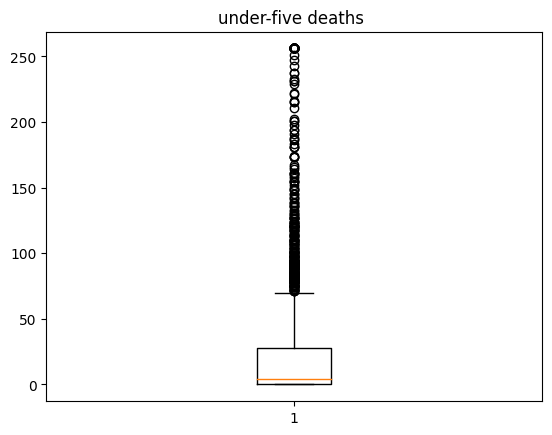

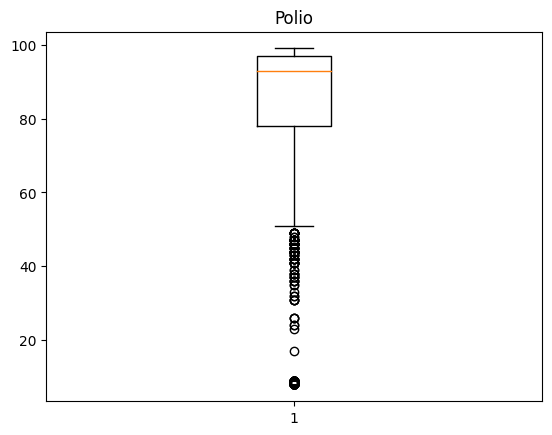

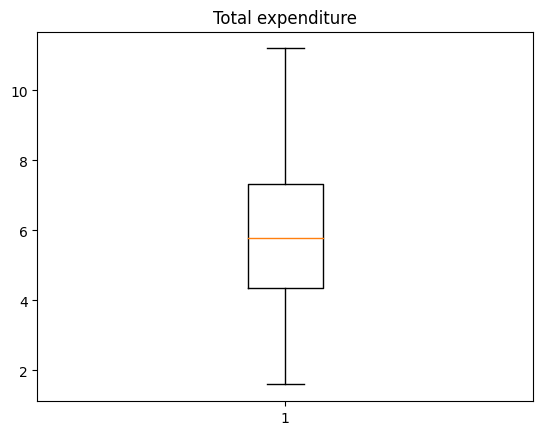

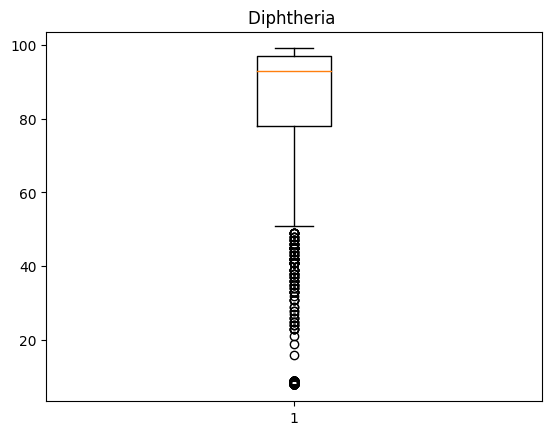

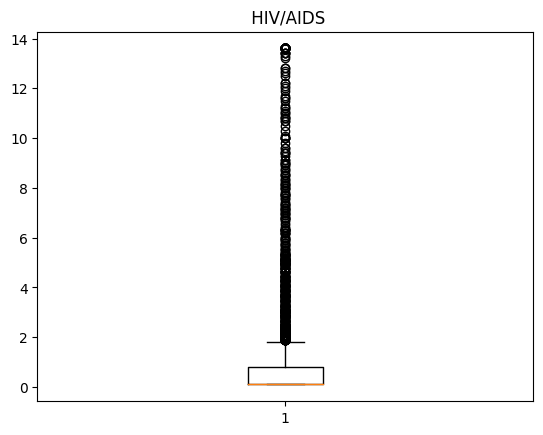

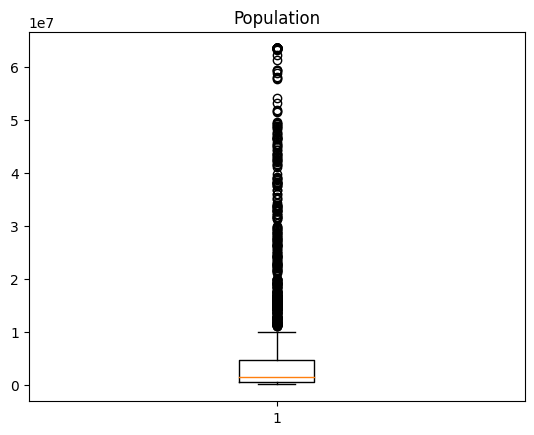

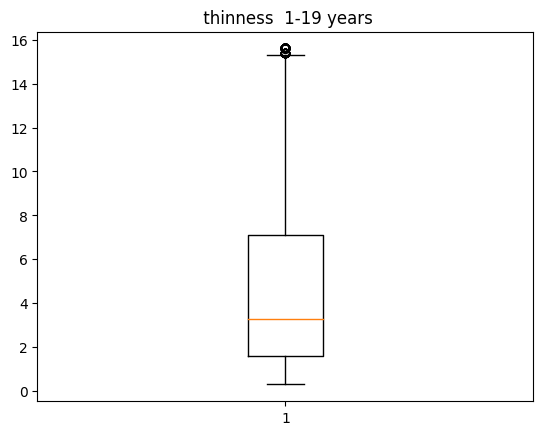

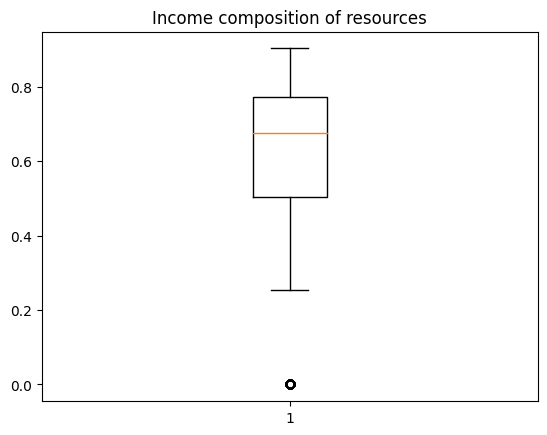

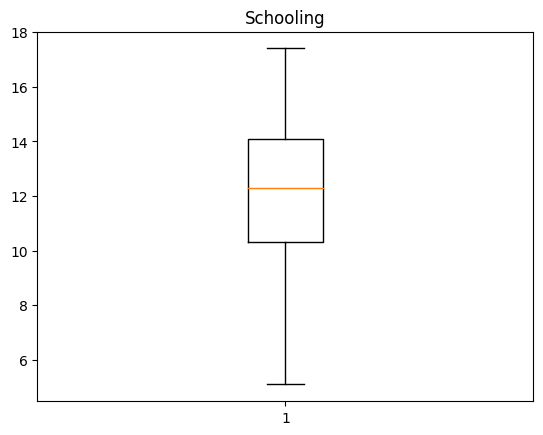

In [ ]:

for col in df_combined.columns:
    if 'Country' in col or 'Status' in col or 'Life expectancy ' in col :
      continue 
    plt.boxplot(df_combined[col])
    plt.title(col)
    plt.show()

In [ ]:
col='percentage expenditure'
aa=winsorize(df_combined[col],(0,0.1))
df_combined=df_combined.drop([col], axis=1)
df_combined[col]=aa
col='Hepatitis B'
aa=winsorize(df_combined[col],(0.1,0))
df_combined=df_combined.drop([col], axis=1)
df_combined[col]=aa
col='Measles '
aa=winsorize(df_combined[col],(0,0.2))
df_combined=df_combined.drop([col], axis=1)
df_combined[col]=aa
col='under-five deaths '
aa=winsorize(df_combined[col],(0,0.1))
df_combined=df_combined.drop([col], axis=1)
df_combined[col]=aa
col='Polio'
aa=winsorize(df_combined[col],(0.1,0))
df_combined=df_combined.drop([col], axis=1)
df_combined[col]=aa
col='Diphtheria '
aa=winsorize(df_combined[col],(0.1,0))
df_combined=df_combined.drop([col], axis=1)
df_combined[col]=aa
col=' HIV/AIDS'
aa=winsorize(df_combined[col],(0,0.15))
df_combined=df_combined.drop([col], axis=1)
df_combined[col]=aa
col='Population'
aa=winsorize(df_combined[col],(0,0.15))
df_combined=df_combined.drop([col], axis=1)
df_combined[col]=aa

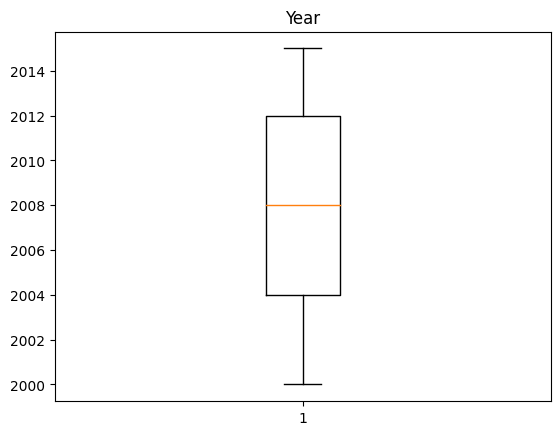

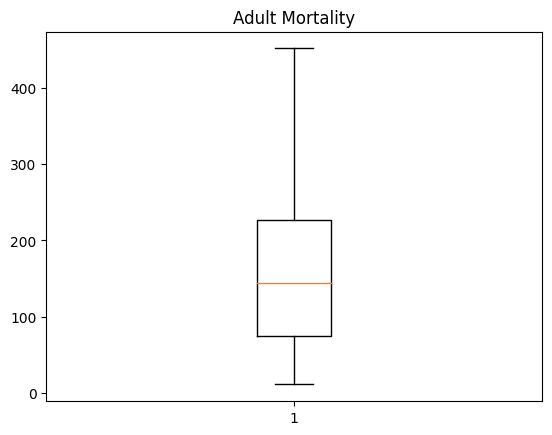

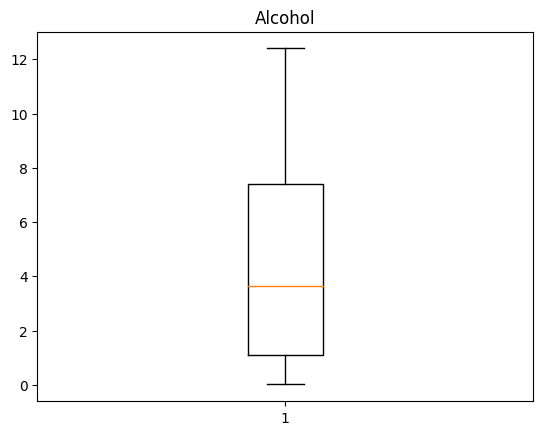

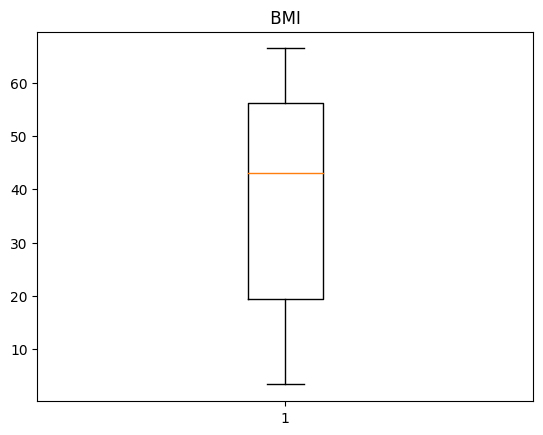

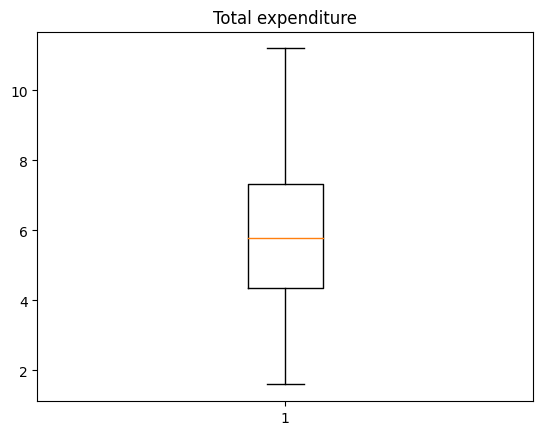

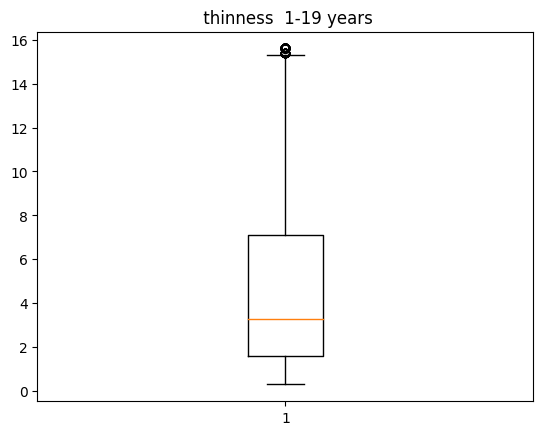

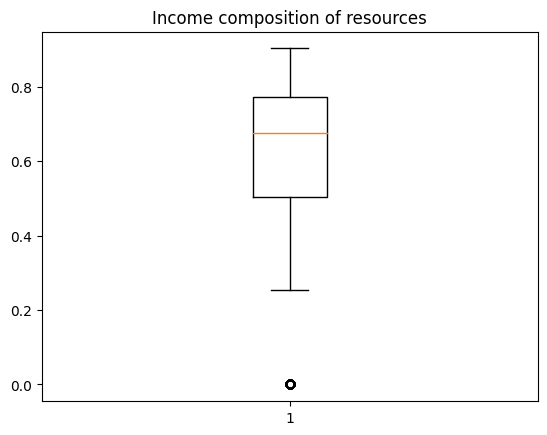

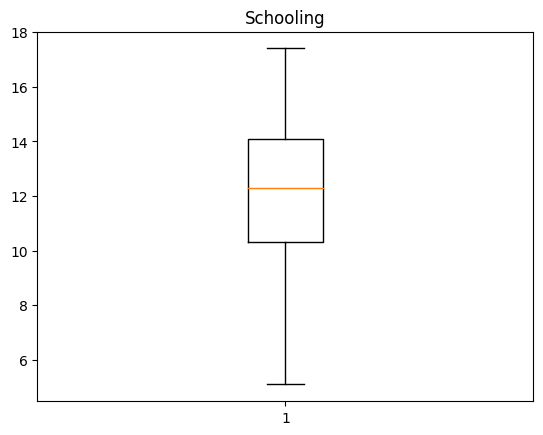

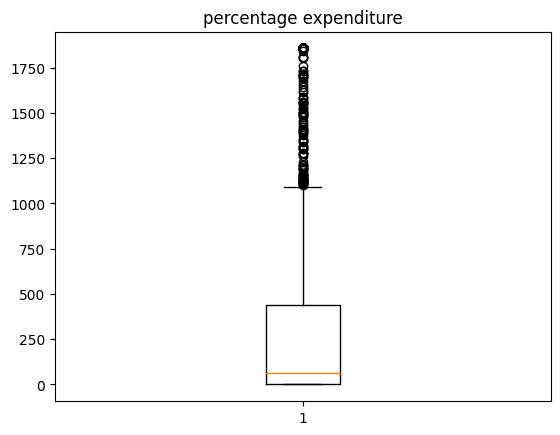

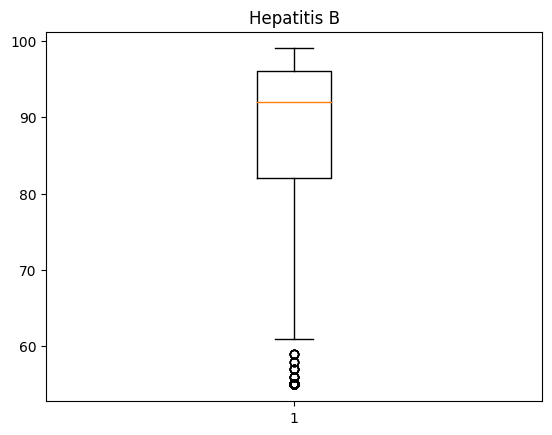

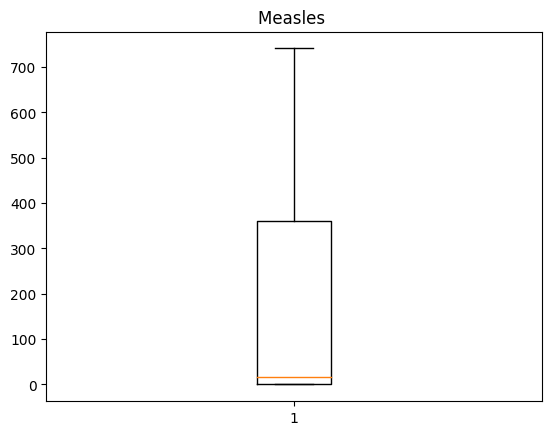

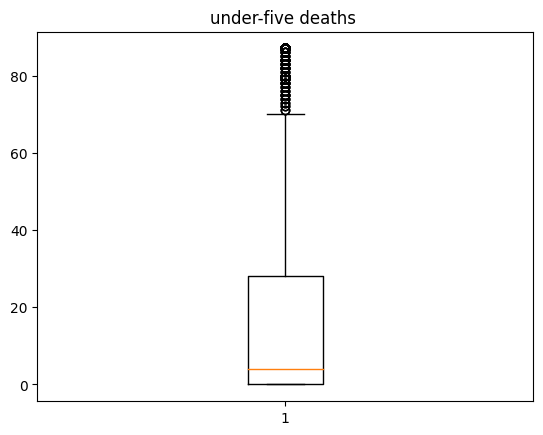

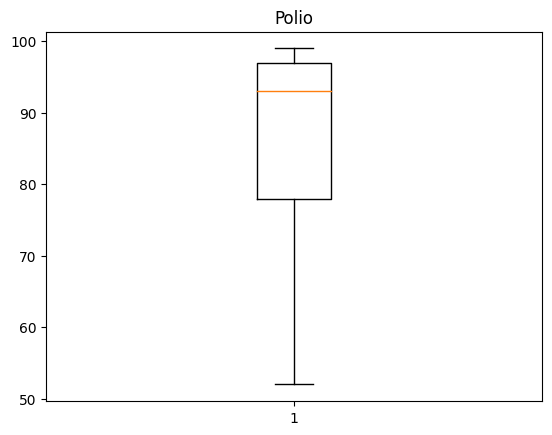

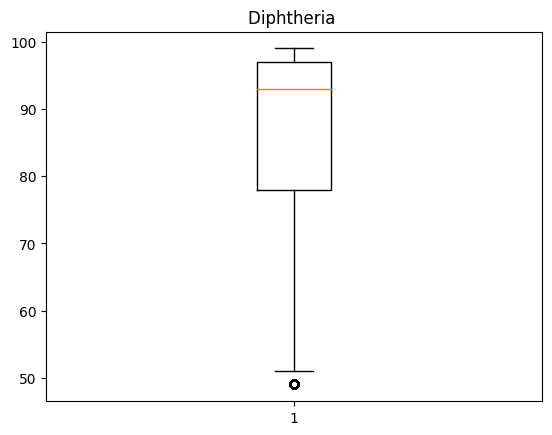

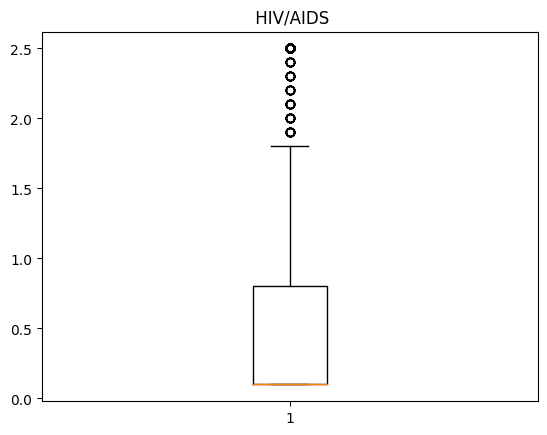

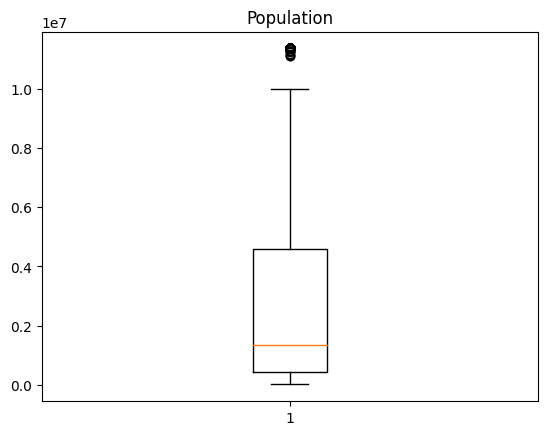

In [ ]:
for col in df_combined.columns:
    if 'Country' in col or 'Status' in col or 'Life expectancy ' in col :
      continue 
    plt.boxplot(df_combined[col])
    plt.title(col)
    plt.show()

In [ ]:
df_combined.to_csv('combining_final.csv', index=False)
df1_f = df_combined.iloc[:2497]
df1_f.to_csv('training.csv', index=False)
df2_f = df_combined.iloc[2497:]
df2_f.to_csv('testing.csv', index=False)

In [ ]:
x = df1_f.drop(Life_expectancy, axis=1).to_numpy()
y = df1_f[Life_expectancy].to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1,0.2,0.3,0.4,0.5, 1, 10, 100]}
model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print('Best alpha:', grid_search.best_params_['alpha'])
alpha_ridge=grid_search.best_params_['alpha']
best_model_ridge = Ridge(alpha=grid_search.best_params_['alpha'])
best_model_ridge.fit(x_train, y_train)
mse = mean_squared_error(y_test, best_model_ridge.predict(x_test))
print('MSE:', mse)


Best alpha: 0.5
MSE: 4.186102673552865


In [ ]:
df2_f_final=df2_f.drop(["Life expectancy "], axis=1)
x = df2_f_final.to_numpy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
y_final=best_model_ridge.predict(x_normalized)
print(len(y_final))
id_arr=np.arange(1,442)
final_df=pd.DataFrame({'Life expectancy':y_final,'ID':id_arr })
final_df.to_csv('bessttt.csv', index=False)

441


from 100 it goes down to 7 mse which is great could it be better if we deleted outliners better with more cv? perhaps 

In [ ]:
df_finnn = pd.read_csv("combining_final.csv")
col='percentage expenditure'
aa=winsorize(df_finnn[col],(0,0.2))
df_finnn=df_finnn.drop([col], axis=1)
df_finnn[col]=aa
col='under-five deaths '
aa=winsorize(df_finnn[col],(0,0.2))
df_finnn=df_finnn.drop([col], axis=1)
df_finnn[col]=aa
col='Population'
aa=winsorize(df_finnn[col],(0,0.2))
df_finnn=df_finnn.drop([col], axis=1)
df_finnn[col]=aa

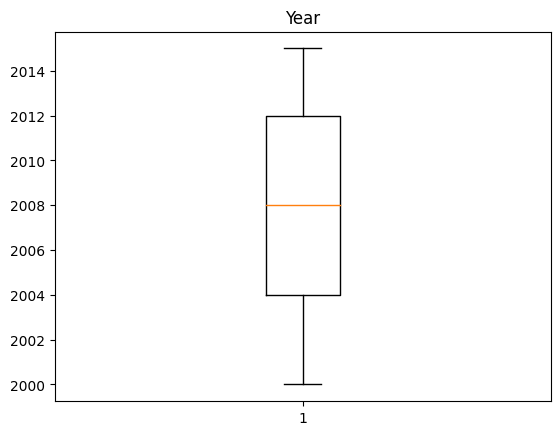

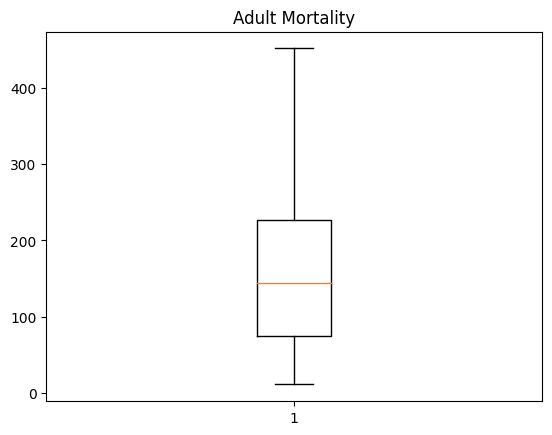

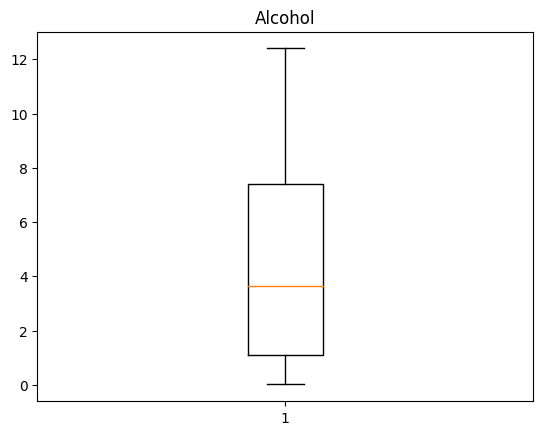

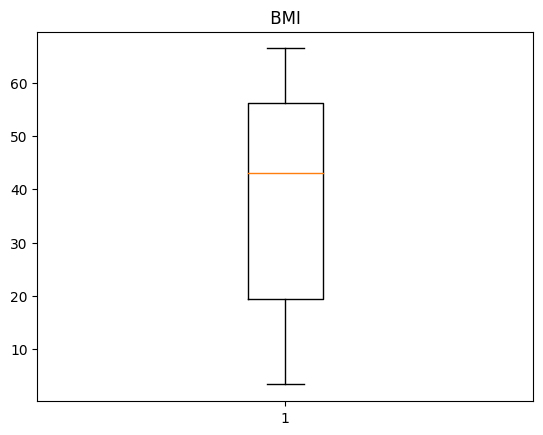

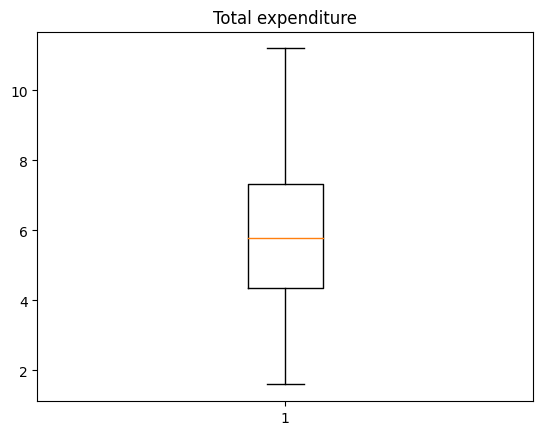

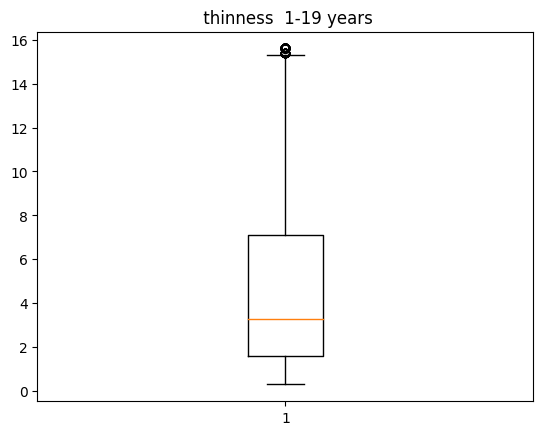

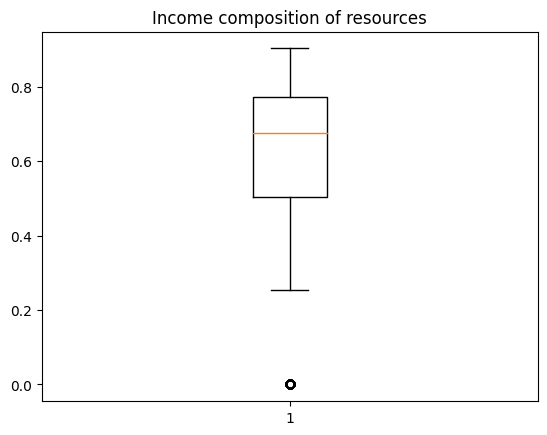

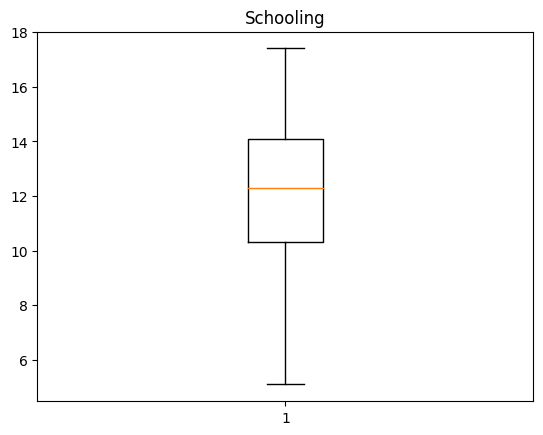

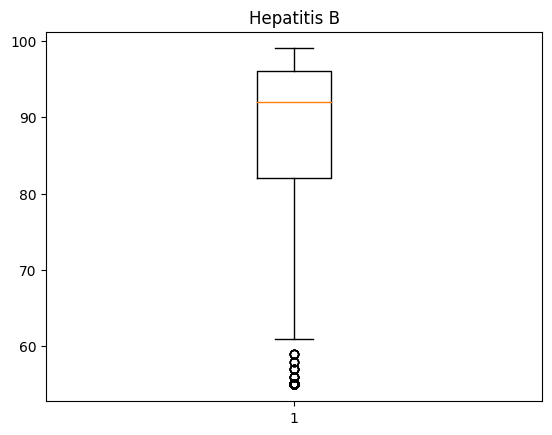

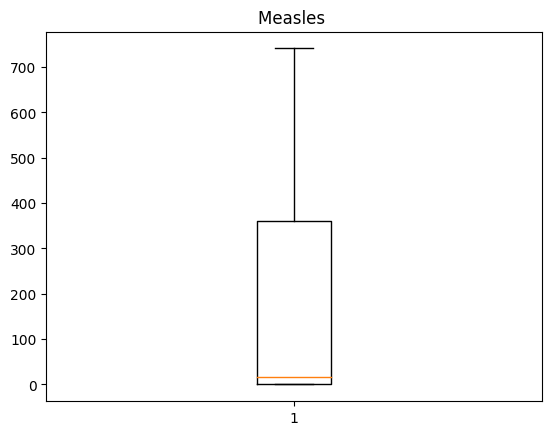

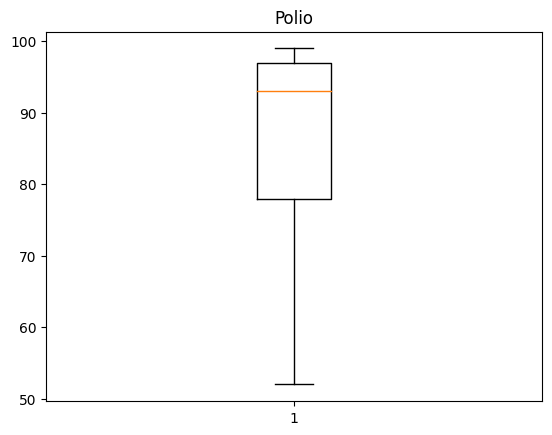

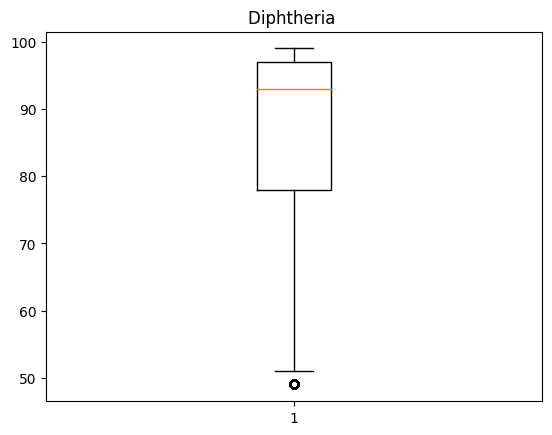

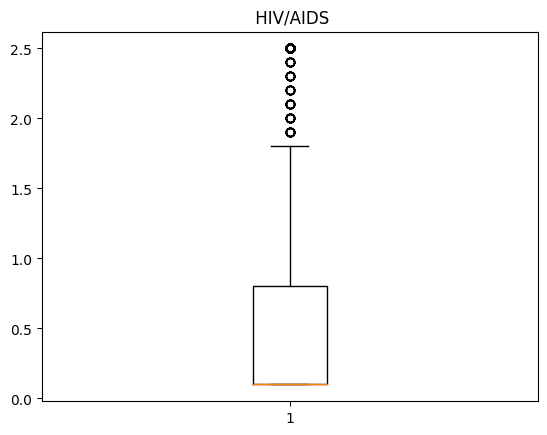

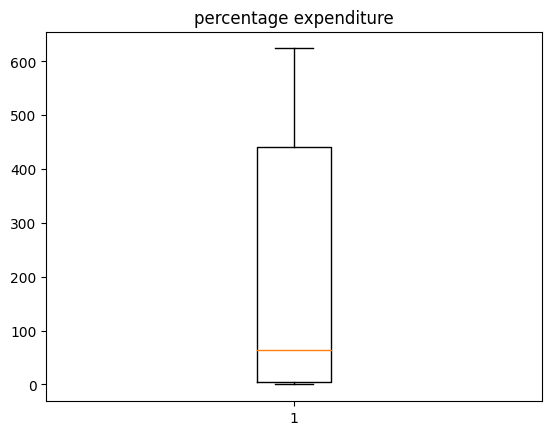

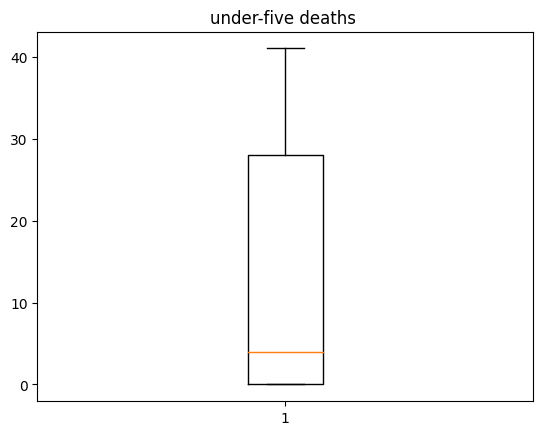

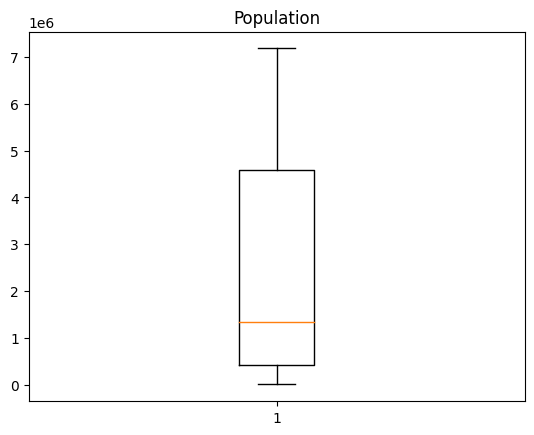

In [ ]:
for col in df_finnn.columns:
    if 'Country' in col or 'Status' in col or 'Life expectancy ' in col :
      continue 
    plt.boxplot(df_finnn[col])
    plt.title(col)
    plt.show()

In [ ]:
df1_fff = df_finnn.iloc[:2497]
df2_fff = df_finnn.iloc[2497:]
x = df1_fff.drop(Life_expectancy, axis=1).to_numpy()
y = df1_fff[Life_expectancy].to_numpy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.linspace(0.01, 1, 100)}
model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=10)
grid_search.fit(x_train, y_train)
print('Best alpha:', grid_search.best_params_['alpha'])
alpha_ridge=grid_search.best_params_['alpha']
best_model_ridge = Ridge(alpha=grid_search.best_params_['alpha'])
best_model_ridge.fit(x_train, y_train)
mse = mean_squared_error(y_test, best_model_ridge.predict(x_test))
print('MSE:', mse)
df2_ffff_final=df2_fff.drop(["Life expectancy "], axis=1)
x = df2_ffff_final.to_numpy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
y_final=best_model_ridge.predict(x_normalized)
print(len(y_final))
id_arr=np.arange(1,442)
final_df=pd.DataFrame({'Life expectancy':y_final,'ID':id_arr })
final_df.to_csv('bessttt2.csv', index=False)

Best alpha: 1.0
MSE: 4.20126676332077
441


it got a bit worse like 0.4 must have been for limiting outliers so much

In [ ]:
df_finnn = pd.read_csv("combining_final.csv")

In [ ]:
df1_fff = df_finnn.iloc[:2497]
df2_fff = df_finnn.iloc[2497:]
x = df1_fff.drop(Life_expectancy, axis=1).to_numpy()
y = df1_fff[Life_expectancy].to_numpy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.linspace(0.01, 5, 200)}
model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print('Best alpha:', grid_search.best_params_['alpha'])
alpha_ridge=grid_search.best_params_['alpha']
best_model_ridge = Ridge(alpha=grid_search.best_params_['alpha'])
best_model_ridge.fit(x_train, y_train)
mse = mean_squared_error(y_test, best_model_ridge.predict(x_test))
print('MSE:', mse)
df2_ffff_final=df2_fff.drop(["Life expectancy "], axis=1)
x = df2_ffff_final.to_numpy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
y_final=best_model_ridge.predict(x_normalized)
print(len(y_final))
id_arr=np.arange(1,442)
final_df=pd.DataFrame({'Life expectancy':y_final,'ID':id_arr })
final_df.to_csv('bessttt3.csv', index=False)

Best alpha: 0.7371859296482413
MSE: 4.184955802946565
441


it gets 0.1 better